### 本质：KNN的主要思想是找到与待测样本最接近的k个样本，然后把这k个样本出现次数最多的类别作为待测样本的类别

In [10]:
import tensorflow as tf
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST",one_hot=True)
# 属性设置
trainNum = 55000
testNum = 10000
trainSize = 500
testSize = 5

Extracting MNIST\train-images-idx3-ubyte.gz
Extracting MNIST\train-labels-idx1-ubyte.gz
Extracting MNIST\t10k-images-idx3-ubyte.gz
Extracting MNIST\t10k-labels-idx1-ubyte.gz


In [24]:
# data 分解 详情看np.random.choice()
trainIndex = np.random.choice(trainNum,trainSize,replace=False)
testIndex = np.random.choice(testNum,testSize,replace=False)
trainData = mnist.train.images[trainIndex] # 获取训练图片
trainLabels = mnist.train.labels[trainIndex] # 获取训练标签
testData = mnist.test.images[testIndex]
testLabels = mnist.test.labels[testIndex]
print("trainData.shape=",trainData.shape)
print("trainLabels.shape=",trainLabels.shape)
print("testData.shape=",testData.shape)
print("testLabels.shape=",testLabels.shape)

trainData.shape= (500, 784)
trainLabels.shape= (500, 10)
testData.shape= (5, 784)
testLabels.shape= (5, 10)


9


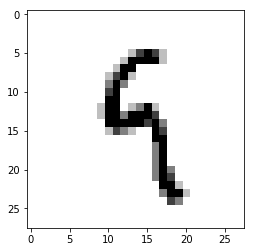

In [31]:
# 展示一下图片和标签
img = trainData[0].reshape((28,28))
# print(trainData[0])
print(np.argmax(trainLabels[0]))
plt.imshow(img,cmap="binary")
# # cv2.imshow("img",img)
# # cv2.waitKey(0)

In [28]:
# tf input  
trainDataInput = tf.placeholder(tf.float32,[None,784])
trainLabelInput = tf.palceholder(tf.float32,[None,10])
testDataInput = tf.placeholder(tf.float32,[None,784])
testLabelInput = tf.palceholder(tf.float32,[None,10])

In [ ]:
# knn distance
f1 = tf.expand_dims(testDataInput,1) # 维度扩展
f2 = tf.subtract(trainDataInput,f1)
f3 = tf.reduce_sum(tf.abs(f2),reduction_indices=2) # 完成数据累加 784像素点的差值